# Monterey Weather: Exploratory Data Visualization

In [34]:
from datetime import datetime

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [35]:
df = pd.read_csv('cleaned_df.csv', parse_dates=['datetime'], index_col=['datetime'])
df.head()

,DATE,HourlyPresentWeatherType,HourlySkyConditions,HourlyVisibility,HourlyDryBulbTemperature,HourlyWindSpeed,DailyMaximumDryBulbTemperature,DailyMinimumDryBulbTemperature,DailyPeakWindSpeed,DailyPrecipitation,averageObscuration
datetime,,,,,,,,,,,
2009-04-01 00:08:00,2009-04-01T00:08:00,NaN,"[{'BKN': SkyCondition(obscuration=7, vertical_...",10.0,52.0,8.0,59.0,49.0,26.0,0.0,7.0
2009-04-01 00:50:00,2009-04-01T00:50:00,NaN,"[{'SCT': SkyCondition(obscuration=4, vertical_...",9.0,52.0,10.0,59.0,49.0,26.0,0.0,4.0
2009-04-01 00:54:00,2009-04-01T00:54:00,NaN,"[{'SCT': SkyCondition(obscuration=4, vertical_...",9.0,50.0,9.0,59.0,49.0,26.0,0.0,4.0
2009-04-01 01:54:00,2009-04-01T01:54:00,NaN,[],9.0,51.0,10.0,59.0,49.0,26.0,0.0,NaN
2009-04-01 02:54:00,2009-04-01T02:54:00,NaN,[],9.0,50.0,16.0,59.0,49.0,26.0,0.0,NaN


Event planners are often most concerned with the presence or absence of sun, which appears  in the dataset as the average sky obscuration value. Averaged across the whole dataset, which hours of the day tend to be more or less obscured?

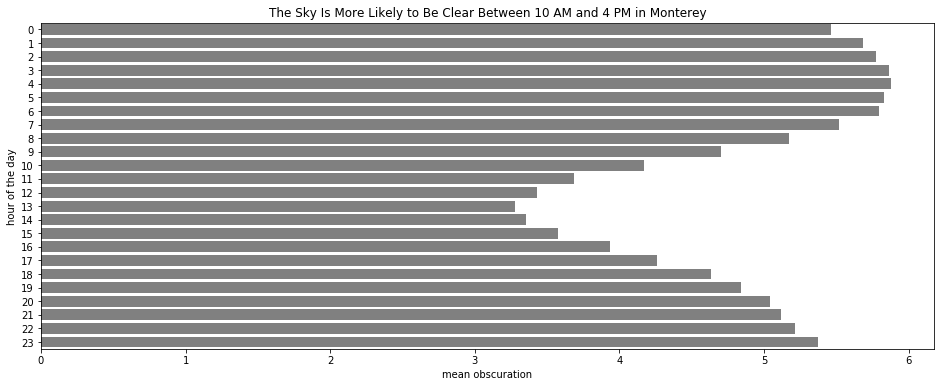

In [36]:
hourly_obscuration = pd.DataFrame(df.groupby(df.index.hour).averageObscuration.mean())
hourly_obscuration = hourly_obscuration.reset_index()
hourly_obscuration.columns = ['hour of the day', 'mean obscuration']
plt.figure(figsize=(16, 6))
sns.barplot(y='hour of the day', x='mean obscuration', color='grey', orient='h', data=hourly_obscuration).set_title('The Sky Is More Likely to Be Clear Between 10 AM and 4 PM in Monterey')
plt.show()

It looks like the hours between 10 AM and 4 PM are the least obscured.


How does the range of each hour's obscuration vary over the course of the year?

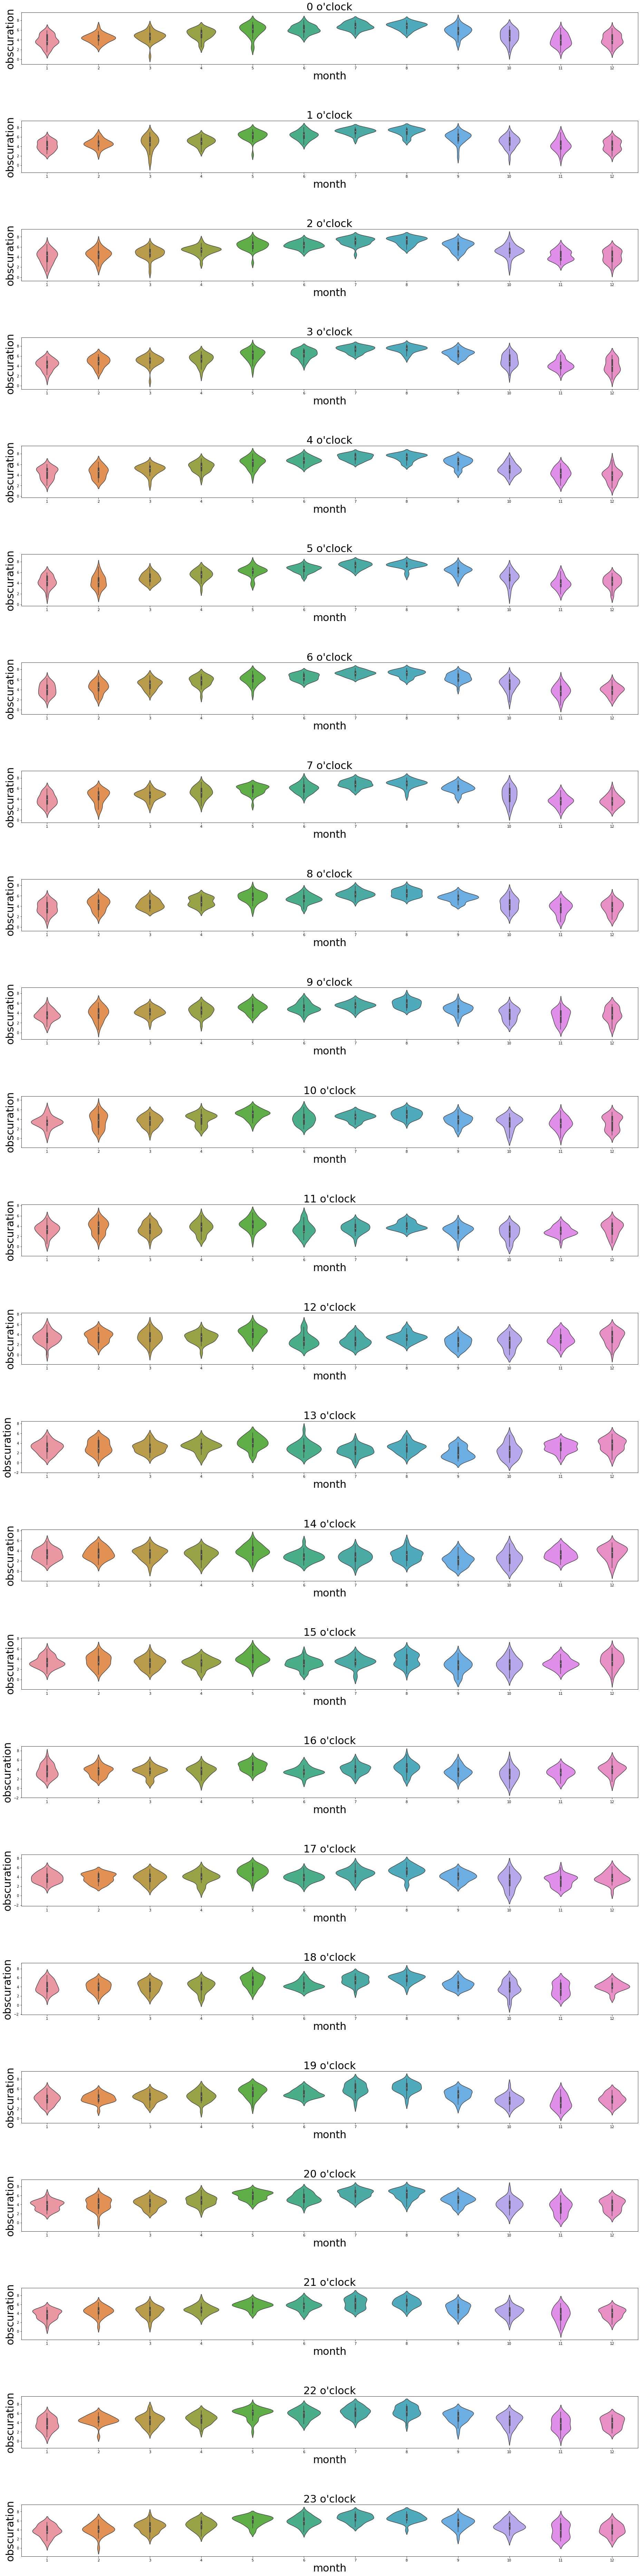

In [37]:

f, axes = plt.subplots(24,1)
f.set_size_inches(32,128)
axes = axes.flatten()

def add_subplot(master_frame, index):
    hour_frame = hours.loc[index]
    hour_frame = hour_frame.reset_index()
    v = sns.violinplot(y='averageObscuration', x='month', data=hour_frame, ax=axes[index])
    v.set_xlabel("month", fontsize=30)
    v.set_ylabel("obscuration", fontsize=30)
    title_string = str(index) + " o'clock"
    v.set_title(title_string, fontsize=30)

hours = df
hours = pd.DataFrame(df.groupby([df.index.hour, df.index.day, df.index.month]).averageObscuration.mean())
hours.index = hours.index.set_names(['hour', 'day', 'month'])
for x in range(24):
    add_subplot(hours, x)
    

    
left   =  0.125  # the left side of the subplots of the figure
right  =  0.9    # the right side of the subplots of the figure
bottom =  0.1    # the bottom of the subplots of the figure
top    =  0.9    # the top of the subplots of the figure
wspace =  .5     # the amount of width reserved for blank space between subplots
hspace =  1.1    # the amount of height reserved for white space between subplots

# This function actually adjusts the sub plots using the above paramters
plt.subplots_adjust(
    left    =  left, 
    bottom  =  bottom, 
    right   =  right, 
    top     =  top, 
    wspace  =  wspace, 
    hspace  =  hspace
)
plt.savefig('figures/hourlyAverageObscurationOverYear.png')
plt.show()

These plots reveal a couple important features of the area's climate. The nighttime and early morning hours become reliably very foggy in the "summer" months, which is the sort of relatively automatic watering that allowed crops like berries to thrive in this area in the early twentieth century. In contrast, late morning to early afternoon hours remain much more varied throughout the year. Noon to around 3 PM in September and October shows the best visibility distribution, which fits the widely known perception of the area's "Indian Summer" (summer weather during fall months).

How many calendar days on average have been clear or nearly clear between 10 AM and 4 PM over the last decade (defined here as a "clearish day")?

In [184]:
# by_date = df[(df.index.hour >= 10) & (df.index.hour <= 16)]
by_date = df.groupby([df.index.month, df.index.day]).averageObscuration.mean()
by_date = by_date.sort_values()
by_date = by_date[by_date <= 3.5] # 3.5 is a conservative cut-off for a clear day: there are at worst "scattered clouds"
print(str(len(by_date)) + " days have had a decade average obscuration rating of under 3.5.")

36 days have had a decade average obscuration rating of under 3.5.


I note that a cut-off of 3.0 cut this down from 36 days to 12 days, which means that scattered cloud days are especially important to this analysis. So which months are these 36 days in?

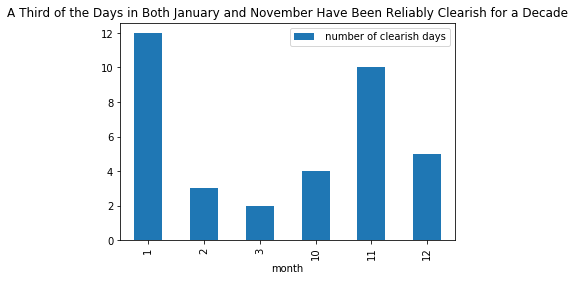

In [187]:
by_date = df.groupby([df.index.month, df.index.day]).averageObscuration.mean()
by_date = by_date.sort_values()
by_date = by_date[by_date <= 3.5] # 3.5 is a conservative cut-off for a clear day: there are at worst "scattered clouds"
by_date = pd.DataFrame(by_date)
by_date.index = by_date.index.rename(["month", "day"])
# by_date = by_date.unstack(level=0)
by_date
by_date.groupby('month').count().rename(columns={'averageObscuration':' number of clearish days'}).plot(kind='bar', title='A Third of the Days in Both January and November Have Been Reliably Clearish for a Decade')
plt.show()

Public consensus  in the area is that September and October have the nicest days, but the data reveal that this understanding might be conflating temperature with sky clarity: November and January have the most reliably clearish days. Which days of the year are the 36 days?

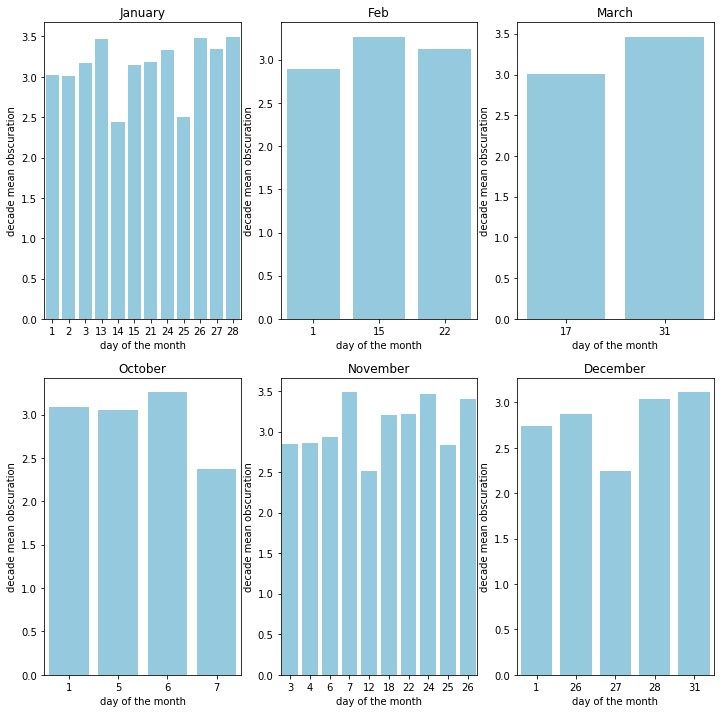

In [ ]:
by_date = df.groupby([df.index.month, df.index.day]).averageObscuration.mean()
by_date = by_date.sort_values()
by_date = by_date[by_date <= 3.5] # 3.5 is a conservative cut-off for a clear day: there are at worst "scattered clouds"
by_date = pd.DataFrame(by_date)
by_date.index = by_date.index.rename(["month", "day"])

# set up subplots
f, axes = plt.subplots(2,3)
f.set_size_inches(12,12)
axes = axes.flatten()

# set up title lookup
month_dict = {1: 'January', 2: 'Feb', 3: 'March', 10: 'October', 11: 'November', 12: 'December'}

# plot a month
def plot_month(frame, month_index, plot_index):
    """Plots the decade mean obscuration for the index month's clearish days"""
    frame = frame.reset_index()
    frame = frame[frame['month'] == month_index]
    frame = frame.set_index('day')
    frame = frame.sort_index()
    b = sns.barplot(data=frame, x=frame.index, color='skyblue', y='averageObscuration', ax=axes[plot_index])
    b.set_xlabel('day of the month')
    b.set_ylabel('decade mean obscuration')
    b.set_title(month_dict[month_index])

for plot, month in enumerate(set(by_date.index.get_level_values(0))):
    plot_month(by_date, month, plot)
    
plt.show()